In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Financial Analytics data.csv")
df.head(10)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
5,6,Hind. Unilever,288265.26,8590.00,NaN
6,7,Maruti Suzuki,263493.81,19283.20,NaN
7,8,Infosys,248320.35,17794.00,NaN
8,9,O N G C,239981.50,22995.88,NaN
9,10,St Bk of India,232763.33,57014.08,NaN


In [3]:
#pd.set_option('display.max_rows',None)  # This function will display all rows.
#df

In [4]:
df.shape

(488, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [11]:
for feat in df.select_dtypes(include=['object','integer','float']):
    print(df.select_dtypes(include=['object','integer','float'])[feat].value_counts())

S.No.
1      1
348    1
346    1
345    1
344    1
      ..
161    1
160    1
159    1
158    1
500    1
Name: count, Length: 488, dtype: int64
Name
Reliance Inds.      1
Dishman Carbogen    1
Timken India        1
GE Power            1
Guj Alkalies        1
                   ..
Tata Global         1
Reliance Nip.Lif    1
Apollo Hospitals    1
MphasiS             1
L T Foods           1
Name: count, Length: 488, dtype: int64
Mar Cap - Crore
583436.72    1
5896.54      1
5497.40      1
5498.45      1
5502.94      1
            ..
16655.58     1
16683.97     1
16728.78     1
17097.54     1
3017.07      1
Name: count, Length: 479, dtype: int64
Sales Qtr - Crore
99810.00    1
584.42      1
299.80      1
1484.24     1
201.50      1
           ..
464.17      1
627.03      1
1730.39     1
394.00      1
2840.75     1
Name: count, Length: 365, dtype: int64
Unnamed: 4
2149.36    1
162.17     1
506.06     1
390.16     1
581.94     1
          ..
1965.77    1
2779.40    1
6509.60    1
4336.11    

In [13]:
# Checking Null Values in Each Features
df.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [15]:
# Calculating Percentage of null values present
df.isnull().sum()/df.shape[0]*100 

S.No.                 0.000000
Name                  0.000000
Mar Cap - Crore       1.844262
Sales Qtr - Crore    25.204918
Unnamed: 4           80.737705
dtype: float64

In [17]:
# Here we will handle missing values of Mar Cap-crore and Sales Qtr- Crore features and we will drop column Unnamed here
df.drop(columns=['Unnamed: 4'],inplace=True)

<Axes: >

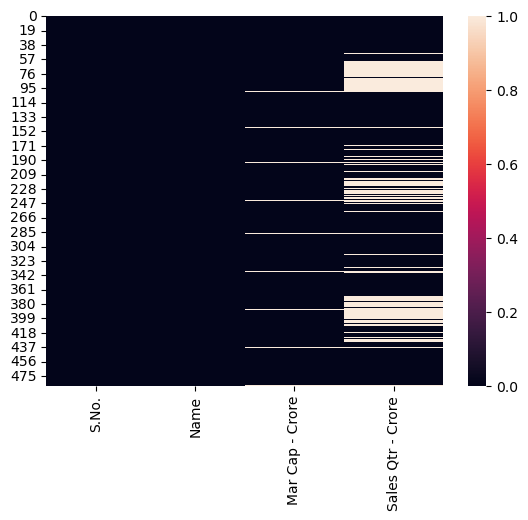

In [19]:
# Visualizing NaNs for better understanding
sns.heatmap(df.isnull())

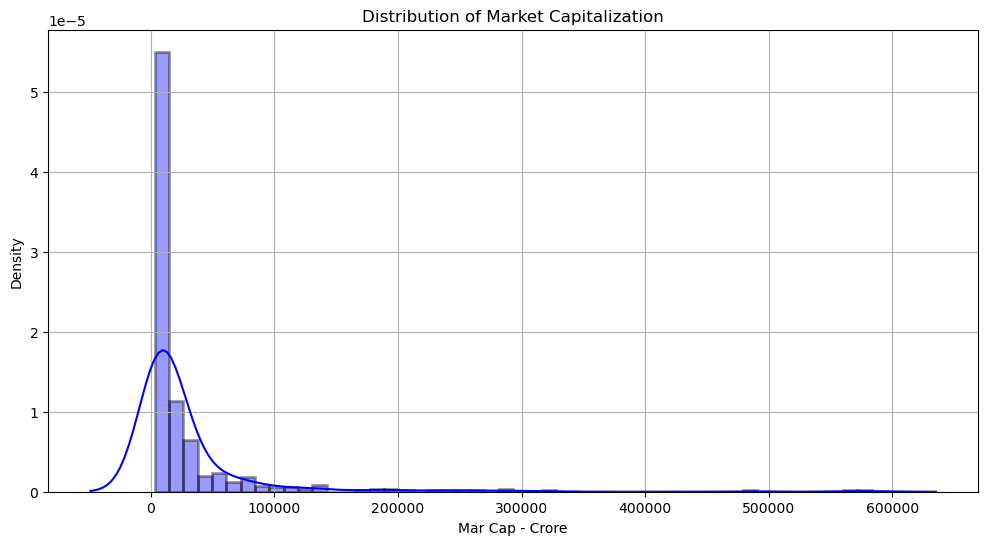

In [21]:
# This function is used to plot gaussian distributionplt.figure(figsize=(12,6))
plt.figure(figsize=(12,6))
#plt.subplot(1,2,1)
sns.distplot(df['Mar Cap - Crore'],color='blue',kde=True,hist_kws={'color':'blue','edgecolor':'k','linewidth':2})
plt.title('Distribution of Market Capitalization')
plt.grid(True)
plt.show()

In [23]:
# Dist function is use to see distribution of "Mar Cap-Crore".If Distribution is towards left or right spread or skewed.
#Than we will use median to replace null values.Hence here we can see distribution is towards right spred so here we use median to fill null values.

df['Mar Cap - Crore'].fillna(df['Mar Cap - Crore'].median(),inplace=True)

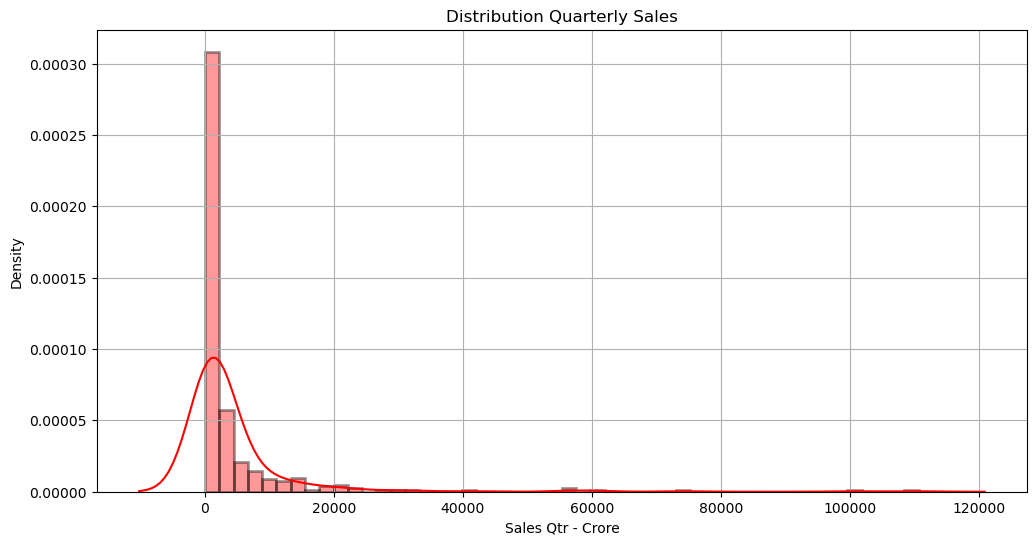

In [25]:
# This function is used to plot gaussian distribution
plt.figure(figsize=(12,6))
sns.distplot(df['Sales Qtr - Crore'],color='red',kde=True,hist_kws={'edgecolor':'k','linewidth':2})
plt.title('Distribution Quarterly Sales')
plt.grid(True)

In [26]:
# Here we can see distribution is towards left so we will fill null values with median
df['Sales Qtr - Crore'].fillna(df['Sales Qtr - Crore'].median(),inplace=True)

In [29]:
df.isnull().sum()

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

<Figure size 800x400 with 0 Axes>

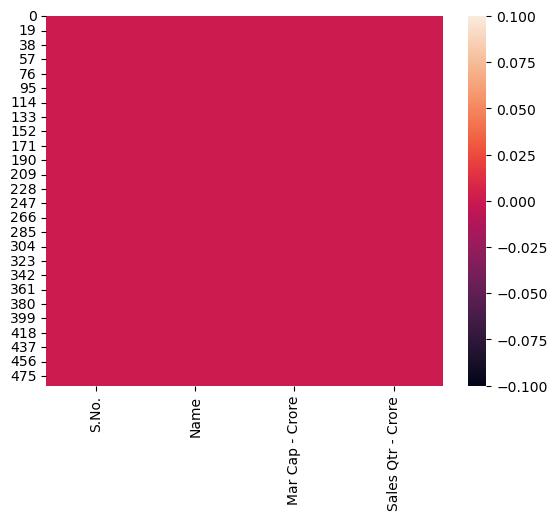

<Figure size 800x400 with 0 Axes>

In [31]:
# Here we can see there is no missing value present in any features.Hence we have handled missing values successfully
# Also we can Visualize through heatmap
sns.heatmap(df.isnull())
plt.figure(figsize=(8,4))

In [32]:
# Checking for duplicate value
df.duplicated().sum()

0

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,488.0,251.508197,145.884078,1.00,122.7500,252.50,378.2500,500.00
Mar Cap - Crore,488.0,27708.961086,58963.329098,3017.07,4879.6125,9885.05,23400.8150,583436.72
Sales Qtr - Crore,488.0,3610.168955,9684.943920,47.24,725.7325,1278.30,2084.0975,110666.93


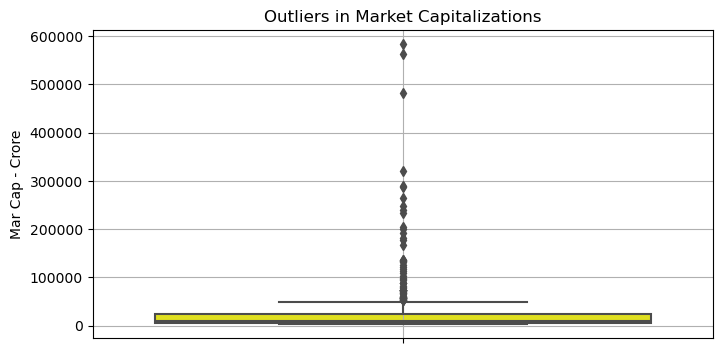

In [37]:
plt.figure(figsize=(8,4))
sns.boxplot(y='Mar Cap - Crore',data=df,color='yellow')
plt.title('Outliers in Market Capitalizations')
plt.grid(True)

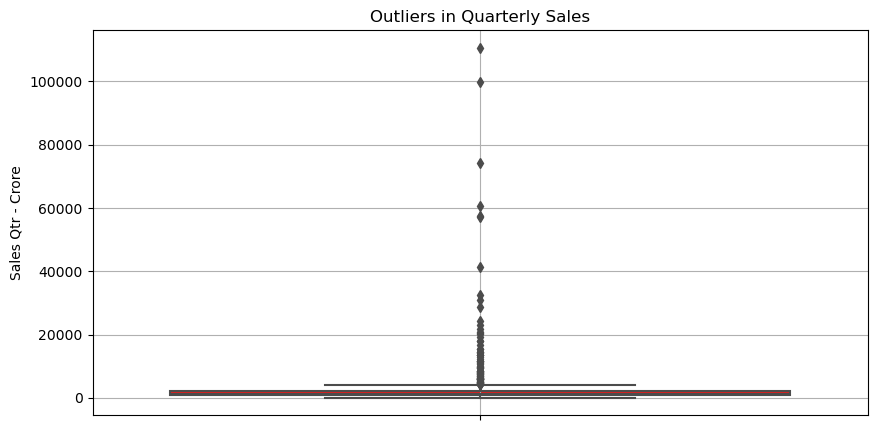

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Sales Qtr - Crore',data=df,color='red')
plt.title('Outliers in Quarterly Sales')
plt.grid(True)

In [41]:
cor_mat=df[['Mar Cap - Crore','Sales Qtr - Crore']].corr()
cor_mat

,Mar Cap - Crore,Sales Qtr - Crore
Mar Cap - Crore,1.000000,0.620489
Sales Qtr - Crore,0.620489,1.000000


Text(0.5, 1.0, 'Correlation Between Market Capitalisation and Quarterly Sales')

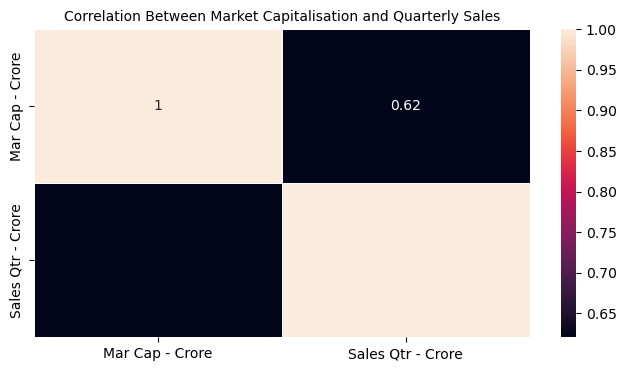

In [43]:
# Heatmap for the Correlation
plt.figure(figsize=(8,4))
sns.heatmap(cor_mat,annot=True,linewidth=0.5)
plt.title('Correlation Between Market Capitalisation and Quarterly Sales',size='10')

In [45]:
top_market=df.nlargest(30,"Mar Cap - Crore")
top_market.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


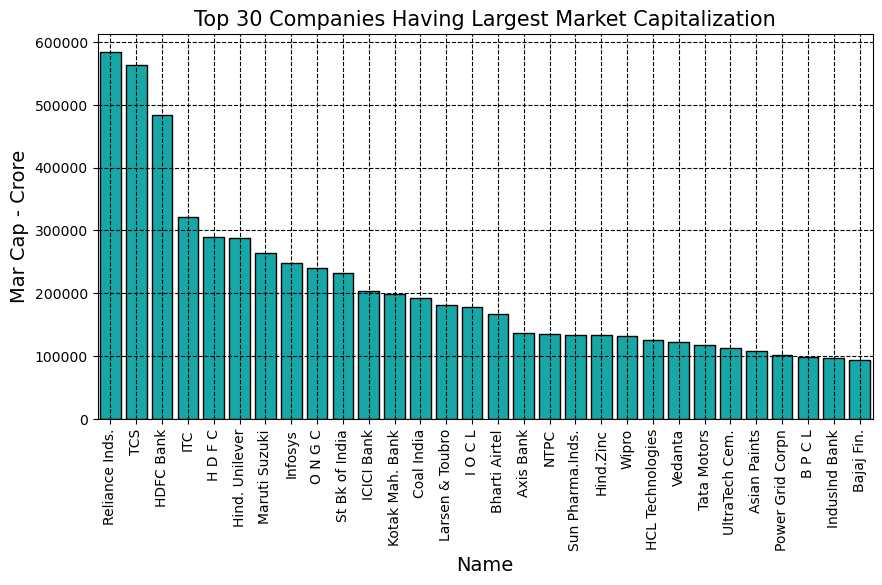

In [181]:
plt.figure(figsize=(10,5))
sns.barplot(x='Name',y='Mar Cap - Crore',data=top_market,linewidth=1,edgecolor='k',color='c')
plt.xticks(rotation=90)
plt.xlabel("Name",size='14')
plt.ylabel("Mar Cap - Crore",size='14')
plt.title('Top 30 Companies Having Largest Market Capitalization',size='15')
plt.grid(color='k',linestyle='--')

In [49]:
top_sales=df.nlargest(30,"Sales Qtr - Crore")
top_sales=top_sales.sort_values(by='Sales Qtr - Crore',ascending=False)
top_sales.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
14,15,I O C L,178017.48,110666.93
0,1,Reliance Inds.,583436.72,99810.00
23,24,Tata Motors,117071.87,74156.07
27,28,B P C L,98278.00,60616.36
54,55,H P C L,58034.78,57474.25


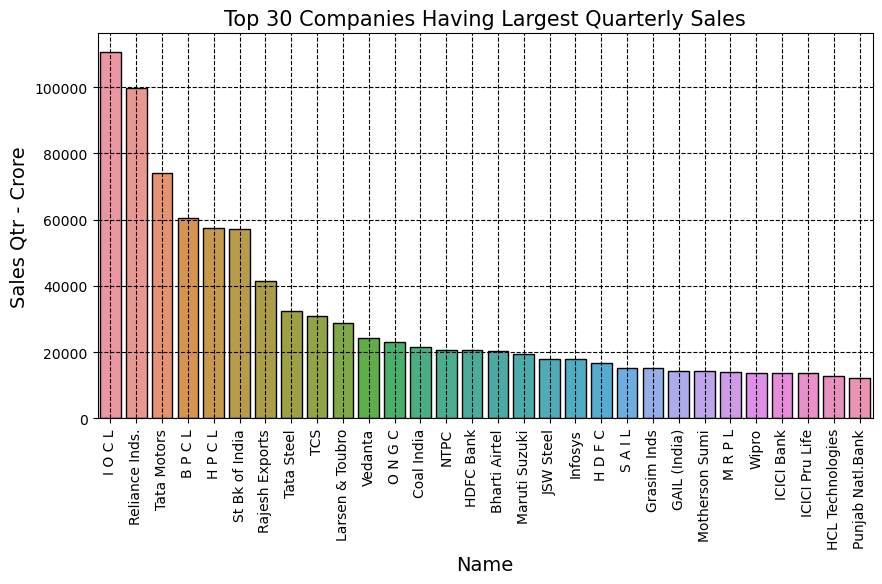

In [179]:
plt.figure(figsize=(10,5))
sns.barplot(x='Name',y='Sales Qtr - Crore',data=top_sales,linewidth=1,
            edgecolor='k')
plt.xticks(rotation=90)
plt.xlabel("Name",size='14')
plt.ylabel("Sales Qtr - Crore",size='14')
plt.title('Top 30 Companies Having Largest Quarterly Sales',size='15')
plt.grid(color='k',linestyle='--')

In [147]:
low_sales=df.nsmallest(30,"Sales Qtr - Crore")
low_sales=low_sales.sort_values(by='Sales Qtr - Crore',ascending=False)
low_sales.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,P/S ratio,Sales Growth Rate,en_Name
465,478,Repco Home Fin,3331.08,277.48,12.004757,-0.888770,374
416,429,Techno Elec.,3975.44,275.64,14.422580,-0.964552,444
438,451,CCL Products,3748.73,273.99,13.681996,-0.785661,69
413,426,Mahindra Holiday,4030.35,267.54,15.064476,-0.790706,291
280,293,Dr Lal Pathlabs,7550.78,262.70,28.742977,-0.612423,118


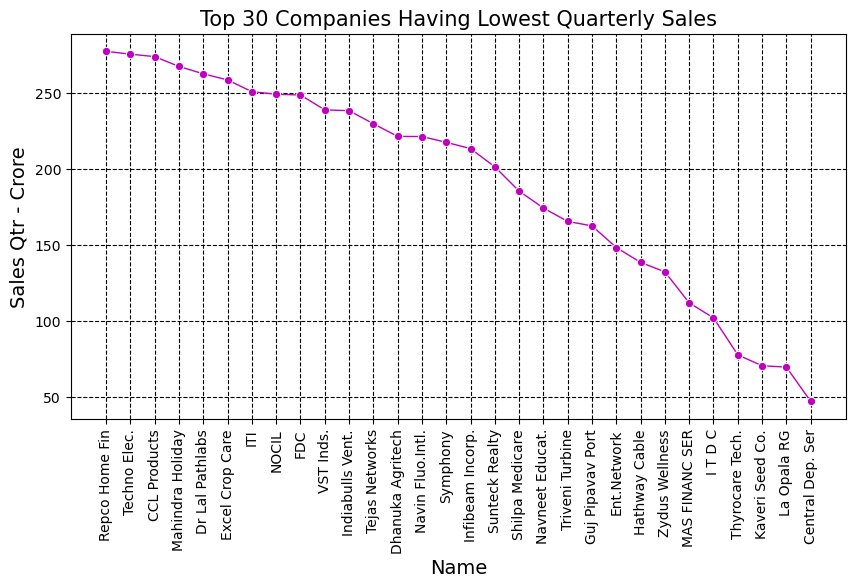

In [199]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Name',y='Sales Qtr - Crore',data=low_sales,linewidth=1,
            color='m',marker='o')
plt.xticks(rotation=90)
plt.xlabel("Name",size='14')
plt.ylabel("Sales Qtr - Crore",size='14')
plt.title('Top 30 Companies Having Lowest Quarterly Sales',size='15')
plt.grid(color='k',linestyle='--')

In [165]:
low_market=df.nsmallest(30,"Mar Cap - Crore")
low_market=low_market.sort_values(by='Mar Cap - Crore',ascending=False)
low_market.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,P/S ratio,Sales Growth Rate,en_Name
457,470,Reliance Home,3470.60,403.00,8.611911,-0.915140,369
458,471,Rupa & Co,3460.91,277.96,12.451108,0.001730,375
459,472,Hind.Construct.,3452.57,1278.30,2.700907,-0.851187,195
460,473,Ent.Network,3380.99,148.42,22.779881,-0.883893,128
461,474,Supreme Petroch.,3377.57,725.02,4.658589,-0.432825,422


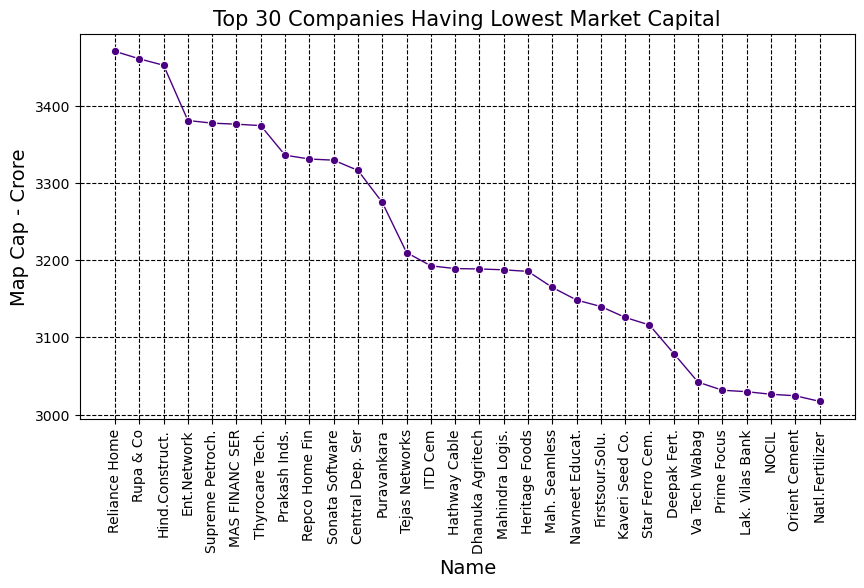

In [193]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Name',y='Mar Cap - Crore',data=low_market,linewidth=1,color='indigo',marker='o')
plt.xticks(rotation=90)
plt.xlabel("Name",size='14')
plt.ylabel("Map Cap - Crore",size='14')
plt.title('Top 30 Companies Having Lowest Market Capital',size='15')
plt.grid(color='k',linestyle='--')

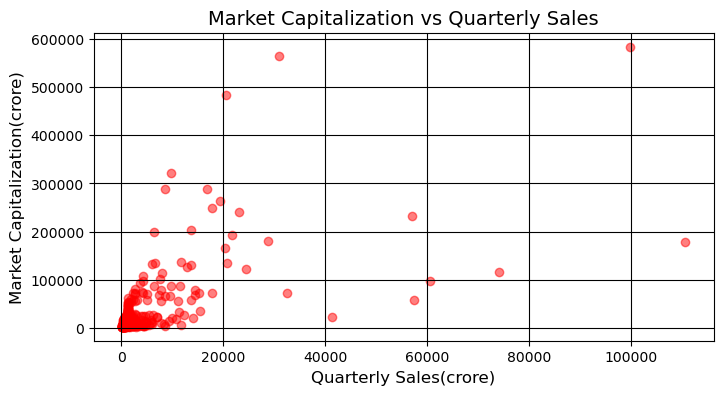

In [53]:
plt.figure(figsize=(8,4))
plt.scatter(df['Sales Qtr - Crore'],df['Mar Cap - Crore'],alpha=0.5,color='red')
plt.title('Market Capitalization vs Quarterly Sales',size='14')
plt.xlabel('Quarterly Sales(crore)',size='12')
plt.ylabel('Market Capitalization(crore)',size='12')
plt.grid(True,color='k')
plt.show()

In [55]:
high_mar_low_sales=df[(df['Mar Cap - Crore']>100000) & (df['Sales Qtr - Crore']<100000)]
high_mar_low_sales[['Name','Mar Cap - Crore','Sales Qtr - Crore']]

,Name,Mar Cap - Crore,Sales Qtr - Crore
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51
5,Hind. Unilever,288265.26,8590.00
6,Maruti Suzuki,263493.81,19283.20
7,Infosys,248320.35,17794.00
8,O N G C,239981.50,22995.88
9,St Bk of India,232763.33,57014.08


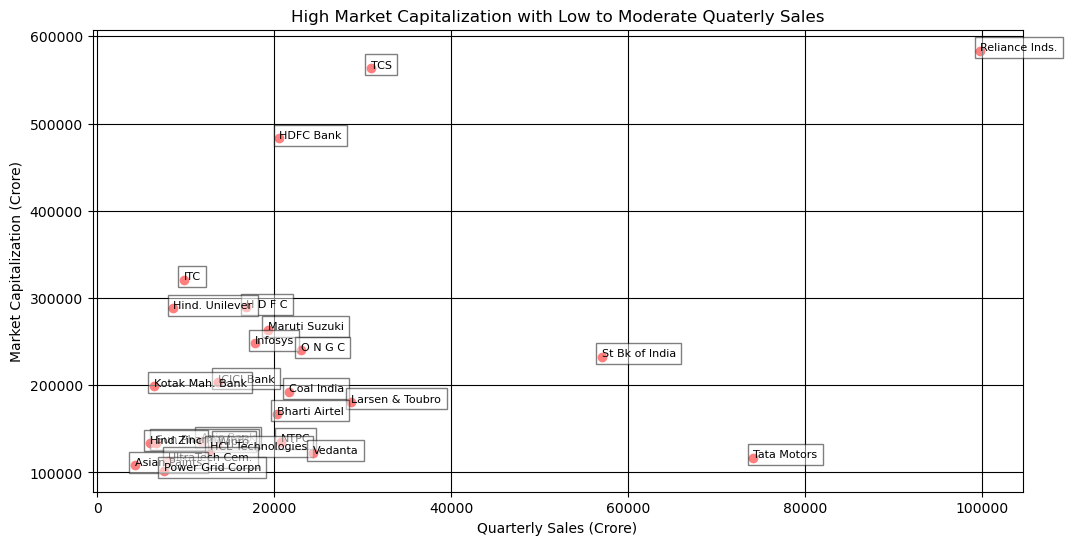

In [57]:
plt.figure(figsize=(12,6))
plt.scatter(x='Sales Qtr - Crore', y='Mar Cap - Crore', data=high_mar_low_sales,color='red')
plt.title('High Market Capitalization with Low to Moderate Quaterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Market Capitalization (Crore)')
plt.grid(True,color='k')

# Annotate points with company names
for i in range(high_mar_low_sales.shape[0]):
    plt.text(x=high_mar_low_sales['Sales Qtr - Crore'].iloc[i], 
             y=high_mar_low_sales['Mar Cap - Crore'].iloc[i], 
             s=high_mar_low_sales['Name'].iloc[i], 
             fontdict=dict(color='black', size=8),
             bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [59]:
high_sale_high_mar=df[(df['Sales Qtr - Crore']>50000) & (df['Mar Cap - Crore']>100000)]
high_sale_high_mar[['Name','Mar Cap - Crore','Sales Qtr - Crore']]

,Name,Mar Cap - Crore,Sales Qtr - Crore
0,Reliance Inds.,583436.72,99810.00
9,St Bk of India,232763.33,57014.08
14,I O C L,178017.48,110666.93
23,Tata Motors,117071.87,74156.07


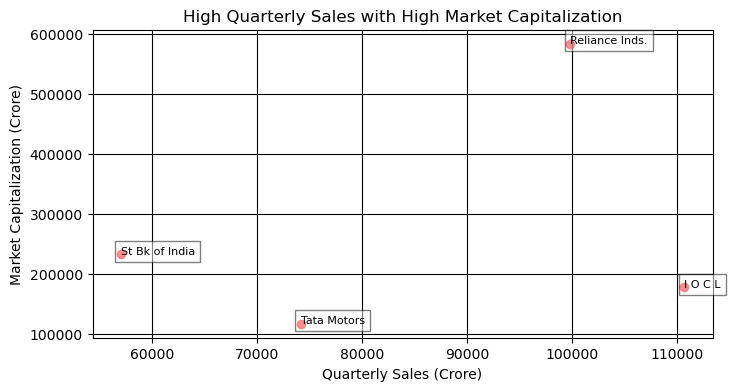

In [61]:
plt.figure(figsize=(8,4))
plt.scatter(x='Sales Qtr - Crore', y='Mar Cap - Crore', data=high_sale_high_mar, alpha=0.9,color='red')
plt.title('High Quarterly Sales with High Market Capitalization')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Market Capitalization (Crore)')
plt.grid(True,color='k')

# Annotate points with company names
for i in range(high_sale_high_mar.shape[0]):
    plt.text(x=high_sale_high_mar['Sales Qtr - Crore'].iloc[i], 
             y=high_sale_high_mar['Mar Cap - Crore'].iloc[i], 
             s=high_sale_high_mar['Name'].iloc[i], 
             fontdict=dict(color='black', size=8),
             bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [63]:
low_mar_low_sales=df[(df['Mar Cap - Crore']<10000) & (df['Sales Qtr - Crore']<1000)]
low_mar_low_sales[['Name','Mar Cap - Crore','Sales Qtr - Crore']]

,Name,Mar Cap - Crore,Sales Qtr - Crore
250,Kajaria Ceramics,9306.54,661.16
251,Astral Poly,9162.14,528.54
252,Bata India,9145.38,674.00
253,Phoenix Mills,9097.33,416.61
256,Infibeam Incorp.,8646.54,213.48
...,...,...,...
481,Va Tech Wabag,3041.93,460.89
482,Prime Focus,3031.50,609.61
483,Lak. Vilas Bank,3029.57,790.17
484,NOCIL,3026.26,249.27


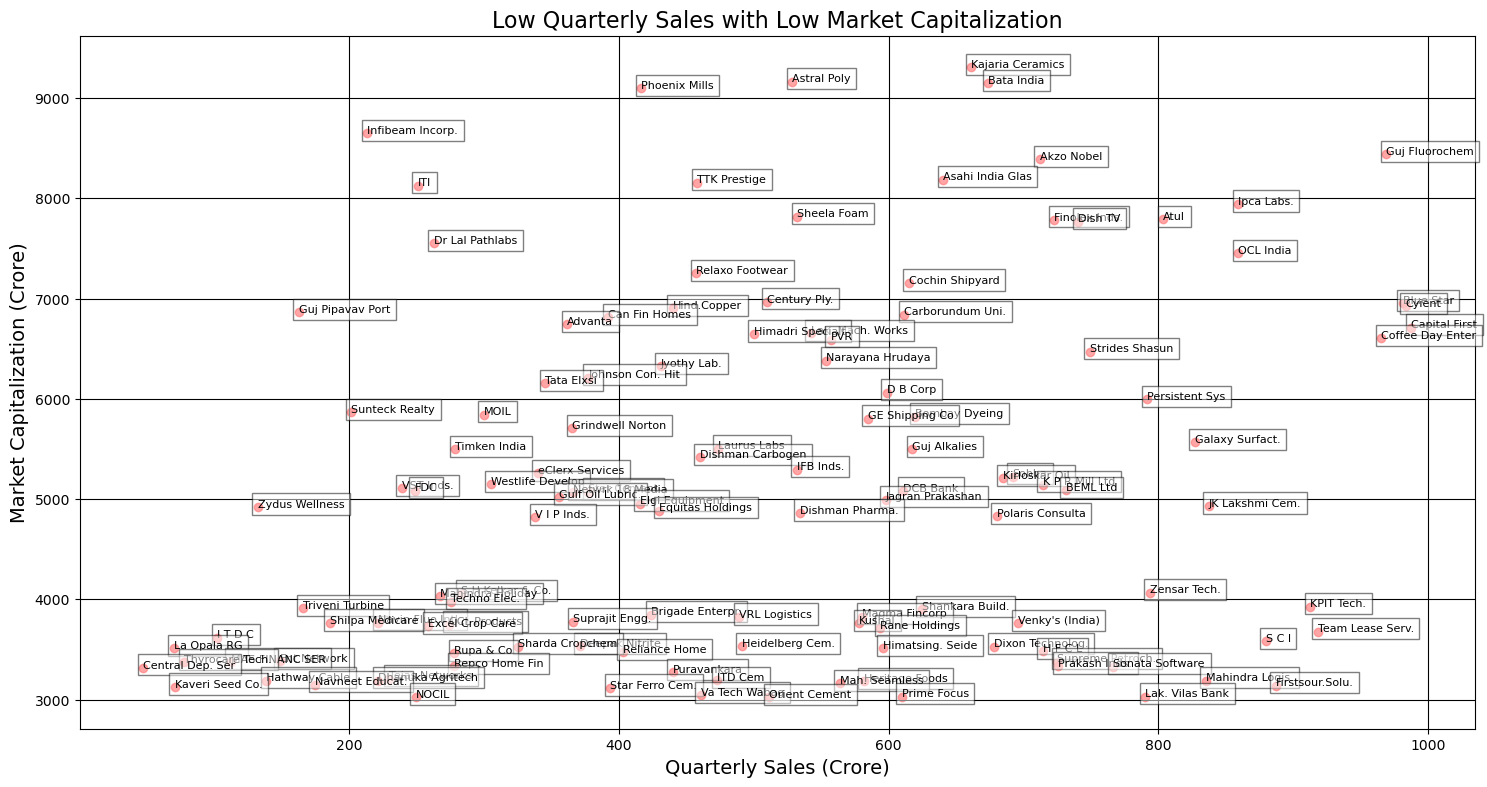

In [65]:
plt.figure(figsize=(18,9))
plt.scatter(x='Sales Qtr - Crore', y='Mar Cap - Crore', data=low_mar_low_sales, alpha=0.7,color='red')
plt.title('Low Quarterly Sales with Low Market Capitalization',size='16')
plt.xlabel('Quarterly Sales (Crore)',size='14')
plt.ylabel('Market Capitalization (Crore)',size='14')
plt.grid(True,color='k')

# Annotate points with company names
for i in range(low_mar_low_sales.shape[0]):
    plt.text(x=low_mar_low_sales['Sales Qtr - Crore'].iloc[i], 
             y=low_mar_low_sales['Mar Cap - Crore'].iloc[i], 
             s=low_mar_low_sales['Name'].iloc[i], 
             fontdict=dict(color='black', size=8),
             bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [66]:
outliers=df[(df['Mar Cap - Crore']>300000) | (df['Sales Qtr - Crore']>100000)]
outliers[['Name','Mar Cap - Crore','Sales Qtr - Crore']]

,Name,Mar Cap - Crore,Sales Qtr - Crore
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
14,I O C L,178017.48,110666.93


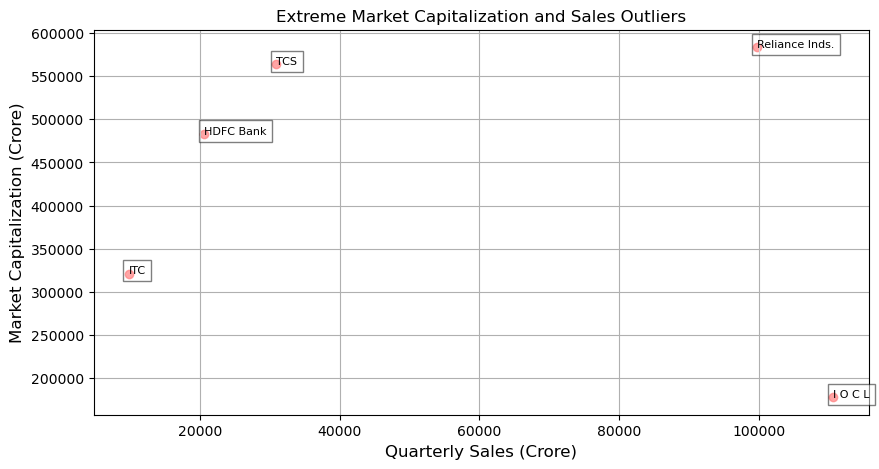

In [69]:
plt.figure(figsize=(10,5))
plt.scatter(x='Sales Qtr - Crore', y='Mar Cap - Crore', data=outliers, alpha=0.7,color='red')
plt.title('Extreme Market Capitalization and Sales Outliers')
plt.xlabel('Quarterly Sales (Crore)',size='12')
plt.ylabel('Market Capitalization (Crore)',size='12')
plt.grid(True)

# Annotate points with company names
for i in range(outliers.shape[0]):
    plt.text(x=outliers['Sales Qtr - Crore'].iloc[i], 
             y=outliers['Mar Cap - Crore'].iloc[i], 
             s=outliers['Name'].iloc[i], 
             fontdict=dict(color='black', size=8),
             bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [71]:
df['P/S ratio']=df['Mar Cap - Crore']/df['Sales Qtr - Crore']
df['P/S ratio']

0       5.845474
1      18.240676
2      23.465685
3      32.847382
4      17.190535
         ...    
483     3.834074
484    12.140490
485     5.912302
486     1.062068
487     7.732966
Name: P/S ratio, Length: 488, dtype: float64

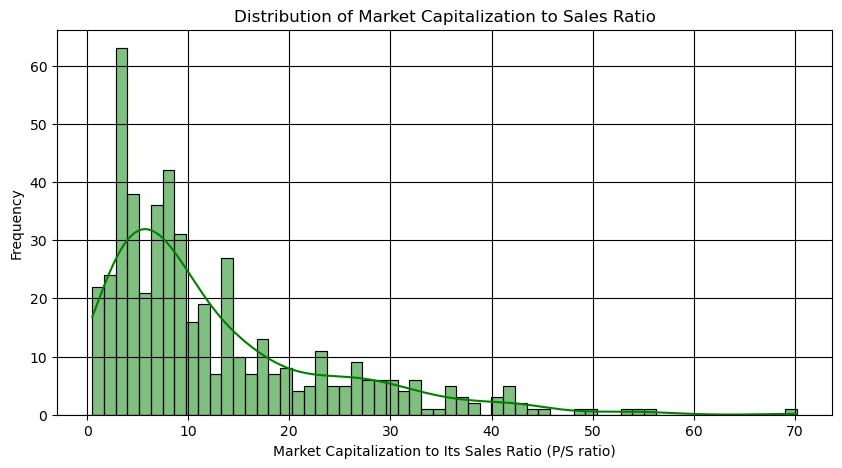

In [73]:
plt.figure(figsize=(10,5))
sns.histplot(df['P/S ratio'],bins=60,kde=True,color='green')
plt.title('Distribution of Market Capitalization to Sales Ratio')
plt.xlabel('Market Capitalization to Its Sales Ratio (P/S ratio)')
plt.ylabel('Frequency')
plt.grid(True,color='k')
plt.show()

In [209]:
# Filter companies with P/S ratio between 1 and 3
ps_low=df[(df['P/S ratio']>=1)&(df['P/S ratio']<=3)]
ps_low.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,P/S ratio,Sales Growth Rate,en_Name
128,131,Adani Enterp.,21776.04,9938.37,2.191108,10.274512,6
202,209,Adani Power,12091.50,4844.46,2.495944,0.801685,8
384,397,Allcargo Logist.,4369.69,1479.91,2.952673,-0.651280,20
451,464,Amber Enterp.,3529.87,1278.30,2.761378,-0.177127,22
27,28,B P C L,98278.00,60616.36,1.621311,46.419510,38


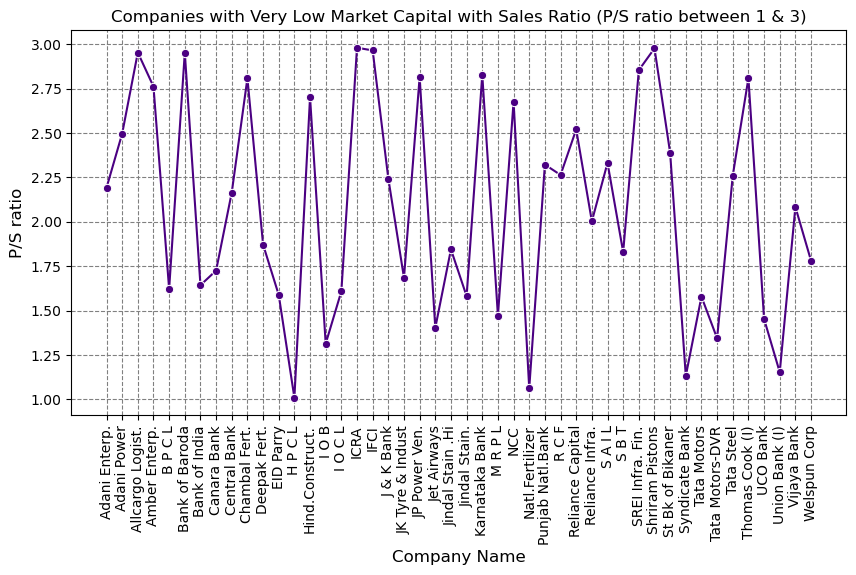

In [213]:
# Plotting Top Companies having low P/S ratio (1 and 3)
plt.figure(figsize=(10,5))
sns.lineplot(x='Name',y='P/S ratio',data=ps_low,marker='o',color='indigo')
plt.title('Companies with Very Low Market Capital with Sales Ratio (P/S ratio between 1 & 3)',size='12')
plt.xlabel('Company Name',size='12')
plt.ylabel('P/S ratio',size='12')
plt.xticks(rotation=90)
plt.grid(color='gray',linestyle='--')

In [79]:
ps_mod=df[(df['P/S ratio']>=5)&(df['P/S ratio']<=6)]
ps_mod

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,P/S ratio
0,1,Reliance Inds.,583436.72,99810.00,5.845474
22,23,Vedanta,122184.17,24361.00,5.015565
35,36,GAIL (India),78670.97,14414.34,5.457827
58,59,Hindalco Inds.,55854.68,11022.81,5.067191
113,114,Future Retail,25859.25,4693.39,5.509717
118,119,Aditya Bir. Nuv.,24592.21,4287.12,5.736301
177,182,PC Jeweller,14334.81,2644.89,5.419813
229,236,GMR Infra.,10653.44,2072.29,5.140902
257,270,Aegis Logistics,8613.86,1442.08,5.973219
266,279,Security & Intel,8247.08,1537.72,5.363187


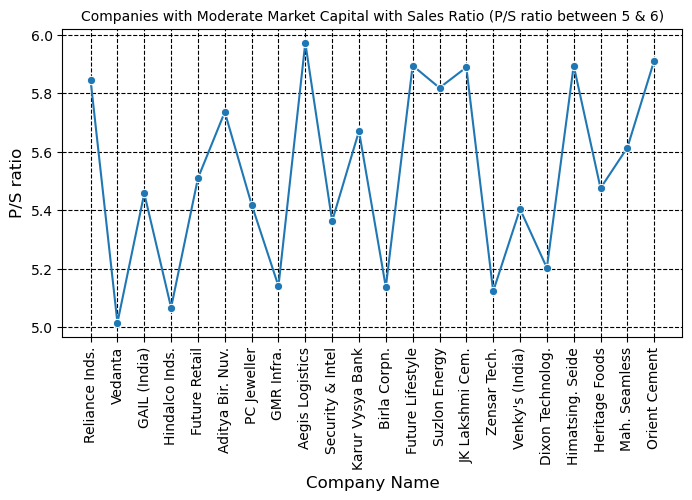

In [203]:
# Plotting Top Companies having moderate P/S ratio (between 5 and 6)
plt.figure(figsize=(8,4))
sns.lineplot(x='Name',y='P/S ratio',data=ps_mod,marker='o')
plt.title('Companies with Moderate Market Capital with Sales Ratio (P/S ratio between 5 & 6)',size='10')
plt.xlabel('Company Name',size='12')
plt.ylabel('P/S ratio',size='12')
plt.xticks(rotation=90)
plt.grid(True,color='k',linestyle='--')

In [83]:
ps_gr=df[df['P/S ratio']>20]

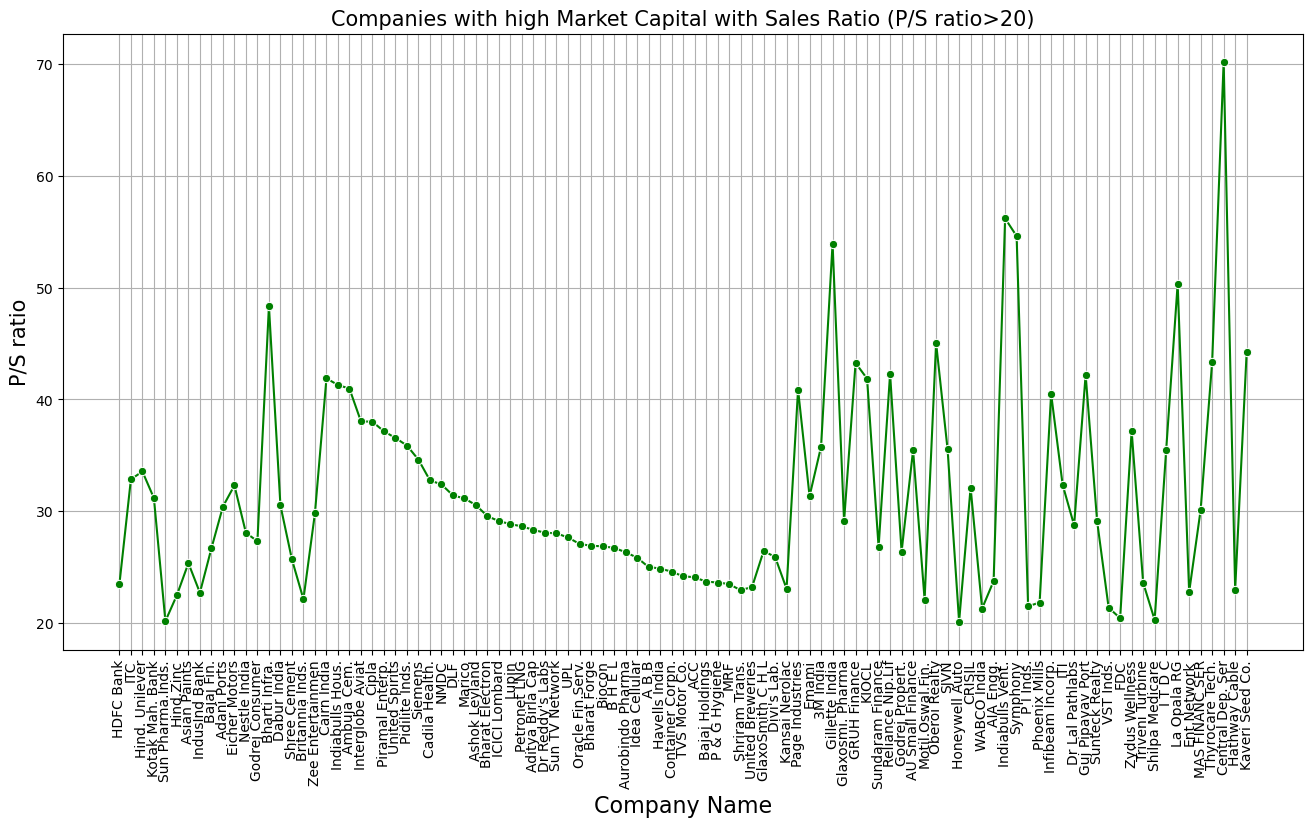

In [85]:
# Plotting Top Companies having high P/S ratio>20
plt.figure(figsize=(16,8))
sns.lineplot(x='Name',y='P/S ratio',data=ps_gr,marker='o',color='green')
plt.title('Companies with high Market Capital with Sales Ratio (P/S ratio>20)',size='15')
plt.xlabel('Company Name',size='16')
plt.ylabel('P/S ratio',size='15')
plt.xticks(rotation=90)
plt.grid(True)

In [89]:
# Determining companies having High P/S ratio
high_ps=df[df['P/S ratio']>=40]
high_ps

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,P/S ratio
49,50,Bharti Infra.,61776.92,1278.30,48.327404
60,61,Cairn India,53528.57,1278.30,41.874810
61,62,Indiabulls Hous.,52781.67,1278.30,41.290519
62,63,Ambuja Cem.,52361.46,1278.30,40.961793
114,115,Page Industries,25383.03,621.03,40.872470
127,130,Gillette India,21976.74,407.52,53.928004
139,142,GRUH Finance,18535.09,428.47,43.258781
140,143,KIOCL,18534.15,442.81,41.855762
157,160,Reliance Nip.Lif,16655.58,394.00,42.273046
164,167,Oberoi Realty,16044.51,356.20,45.043543


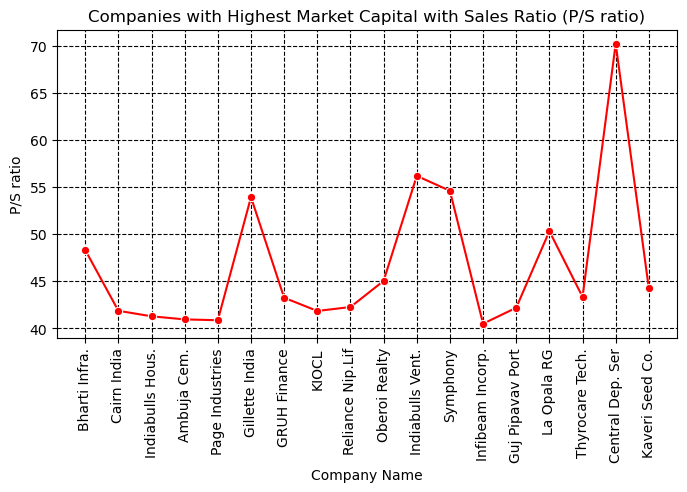

In [205]:
# Plotting Companies having Highest P/S ratio
plt.figure(figsize=(8,4))
sns.lineplot(x='Name',y='P/S ratio',data=high_ps,marker='o',color='red')
plt.title('Companies with Highest Market Capital with Sales Ratio (P/S ratio)',size='12')
plt.xlabel('Company Name')
plt.ylabel('P/S ratio')
plt.xticks(rotation=90)
plt.grid(color='k',linestyle='--')

In [95]:
# Sorting Company Name and Quarter Sales
df=df.sort_values(by=['Name','Sales Qtr - Crore'])

In [97]:
df['Sales Growth Rate']=df['Sales Qtr - Crore'].pct_change()
df['Sales Growth Rate']

124         NaN
90     0.979497
94     0.000000
183   -0.552406
367    1.297225
         ...   
44     4.043569
59    -0.637483
411   -0.568156
360   -0.833199
340    1.567145
Name: Sales Growth Rate, Length: 488, dtype: float64

In [99]:
# Removing rows with NaN values in the sales growth column rate 
df=df.dropna(subset=['Sales Growth Rate'])

In [101]:
# Top 40 sales growth rate companies
top_rate=df.nlargest(40,"Sales Growth Rate")
top_rate.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,P/S ratio,Sales Growth Rate
0,1,Reliance Inds.,583436.72,99810.00,5.845474,246.667494
10,11,ICICI Bank,203802.35,13665.35,14.913804,132.790386
17,18,NTPC,135390.53,20774.37,6.517191,82.340835
54,55,H P C L,58034.78,57474.25,1.009753,79.448826
23,24,Tata Motors,117071.87,74156.07,1.578723,57.011476


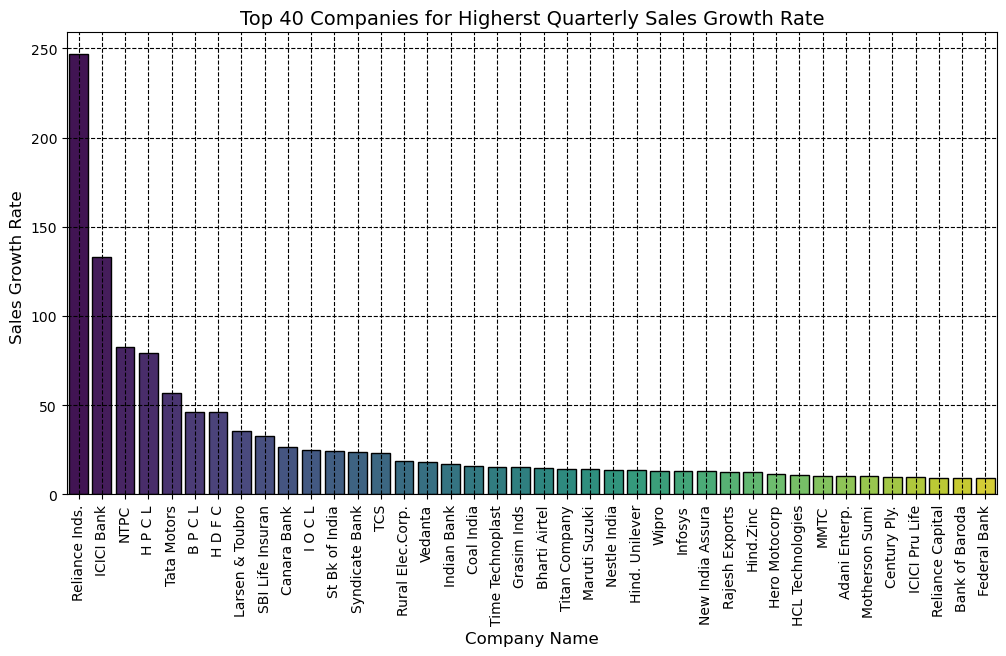

In [201]:
plt.figure(figsize=(12,6))
sns.barplot(x='Name',y='Sales Growth Rate',data=top_rate,palette='viridis',edgecolor='k')
plt.title('Top 40 Companies for Higherst Quarterly Sales Growth Rate',size='14')
plt.xlabel('Company Name',size='12')
plt.ylabel('Sales Growth Rate ',size='12')
plt.xticks(rotation=90)
plt.grid(color='k',linestyle='--')

In [105]:
# Top 40 smallest sales growth rate companies
low_rate=df.nsmallest(40,"Sales Growth Rate")

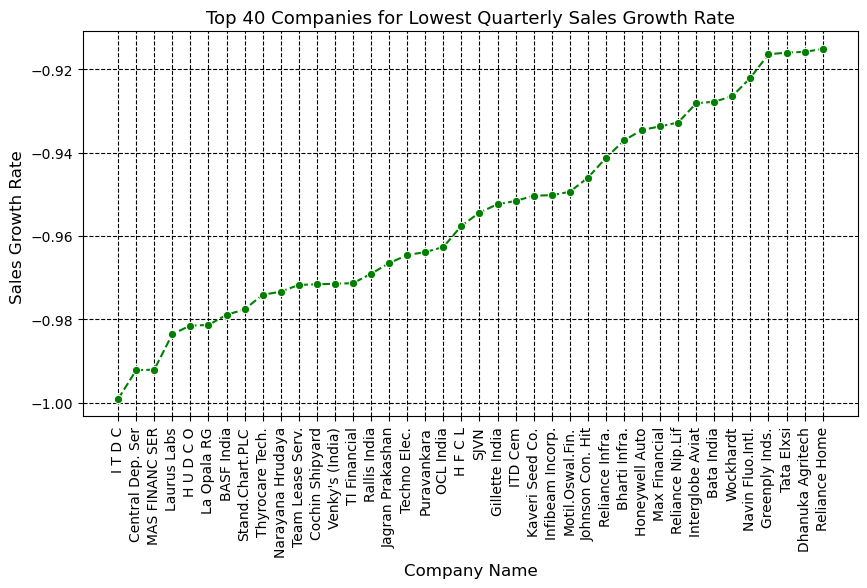

In [215]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Name',y='Sales Growth Rate',data=low_rate,marker='o',color='green',linestyle='--')
plt.title('Top 40 Companies for Lowest Quarterly Sales Growth Rate',size='13')
plt.xlabel('Company Name',size='12')
plt.ylabel('Sales Growth Rate ',size='12')
plt.xticks(rotation=90)
plt.grid(color='k',linestyle='--')

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [111]:
#Encoding Companies Name

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [113]:
le.fit_transform(df['Name'])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [115]:
df['en_Name']=le.fit_transform(df['Name'])
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,P/S ratio,Sales Growth Rate,en_Name
90,91,A B B,31983.33,1278.30,25.020207,0.979497,0
94,95,ACC,30803.68,1278.30,24.097379,0.000000,1
183,190,AIA Engg.,13593.35,572.16,23.757952,-0.552406,2
367,380,APL Apollo,4775.03,1314.38,3.632914,1.297225,3
160,163,AU Small Finance,16453.67,464.17,35.447508,-0.646853,4


In [117]:
# Copy All Integer and Float type features from Original dataframe
df1=df[['S.No.','en_Name','Mar Cap - Crore','Sales Qtr - Crore']].copy()
df1

,S.No.,en_Name,Mar Cap - Crore,Sales Qtr - Crore
90,91,0,31983.33,1278.30
94,95,1,30803.68,1278.30
183,190,2,13593.35,572.16
367,380,3,4775.03,1314.38
160,163,4,16453.67,464.17
...,...,...,...,...
44,45,482,71028.13,5070.30
59,60,483,54817.89,1838.07
411,424,484,4066.42,793.76
360,373,485,4921.45,132.40


In [119]:
# Defining the features and set the target variable
x=df[['Mar Cap - Crore']]
y=df['Sales Qtr - Crore']

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [123]:
model=RandomForestRegressor(n_estimators=100,random_state=42)

In [125]:
model.fit(x_test,y_test)

RandomForestRegressor(random_state=42)

In [127]:
model.score(x_test,y_test)

0.9217412550445301

In [129]:
y_test

344     1516.08
259     6086.20
382     1278.30
372     1278.30
341      691.90
         ...   
362     1213.08
28      4286.78
8      22995.88
428     1278.30
98      1278.30
Name: Sales Qtr - Crore, Length: 98, dtype: float64

In [131]:
y_pred=model.predict(x_test)
y_pred

array([ 1196.0234,  4453.7785,  1278.3   ,  1278.3   ,   933.6366,
         543.167 ,   878.7515,  3347.1027,   409.0681,  2006.6892,
        2826.0642,  1350.7988,  2064.4569,   458.5472,   298.4024,
        8550.9298,  4485.4108,  6233.9858,  3421.1928,   799.062 ,
        2369.7753,  1551.4858,  1151.1896,  1481.7644, 24398.84  ,
        1278.8394,  1496.0234,  4121.2458,   827.2839, 15676.7472,
         778.656 ,   862.3778,  2823.2885,  1980.5675,  1336.1832,
        1559.207 ,  4060.5784, 11523.7352,   571.6593,  4087.37  ,
         416.0312,  1145.366 ,  1478.6789,  1897.9666,  4957.3825,
        2444.227 ,  1190.9006,   682.3358,  1156.2077,  1307.9553,
        2688.9145, 17945.5916,   602.9123,  1571.6645,  1630.0478,
       10712.25  ,  1156.2077,   432.0625,   242.0761,   371.1263,
        4500.3273,   354.8693,  1273.0824,  1270.2611,  3532.5496,
        2453.8962,  1478.6789,  1362.703 ,  1905.1504,  2807.737 ,
       43505.901 ,   241.1579,   726.6211,  7145.814 ,   482.4

In [133]:
# Creating DataFrame for Actual Quarterly Sales and Predicted Quarterly Sales
results=pd.DataFrame({
    'Market Capital':x_test['Mar Cap - Crore'],
    'Actual Quarterly Sales':y_test,
    'Predicted Quarterly Sales':y_pred})
results

,Market Capital,Actual Quarterly Sales,Predicted Quarterly Sales
344,5151.85,1516.08,1196.0234
259,8539.88,6086.20,4453.7785
382,4401.66,1278.30,1278.3000
372,4600.73,1278.30,1278.3000
341,5224.11,691.90,933.6366
...,...,...,...
362,4885.75,1213.08,1004.0768
28,97379.96,4286.78,5897.4730
8,239981.50,22995.88,26836.9830
428,3804.58,1278.30,1279.3788


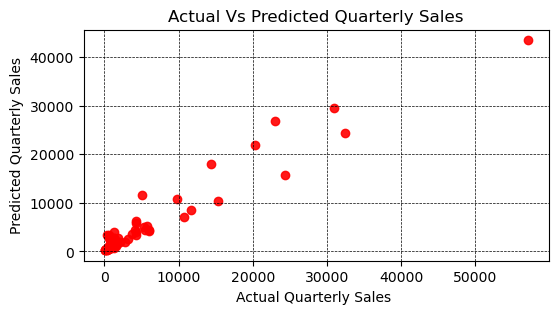

In [135]:
# Plotting Actual vs Predicted Quarterly Sales

plt.figure(figsize=(6,3))
plt.scatter(x=y_test,y=y_pred,color='red',marker='o',alpha=0.9)
plt.xlabel('Actual Quarterly Sales ')
plt.ylabel('Predicted Quarterly Sales')
plt.title('Actual Vs Predicted Quarterly Sales')
plt.grid(color='k',linestyle='--',linewidth=0.5)
plt.show()